---

<center><font size="6"><b> K-Means Clustering Algorithm </b></font></center>
 
<br>
<center><font size="5"><b> Jade Gee  </b></font></center>

---
---

## Introduction

### Unsupervised Learning.

<font size="3">Unsupervised learning, in some pattern recognition problems, seeks to find groups of data that share similarities, also known as **clustering**, or discover how the data is distributed in the space (**density estimation**). 
    Unsupervised learning, however, does present the following issues:

+ It is more difficult when compared to Supervised Learning.

+ We cannot be sure that our results are accurate or meaningful since it deals in unlabeled data.

+ We must perform external and internal evaluations to allow an expert to analyze the results (external) and define objective clustering functions (internal) </font>

### Clustering.

<font size="3"> Clustering may be considered one of the most important unsupervised learning problems, and with these problems, it deals with finding structure in a set of unlabeled data. The term clustering loosely defined would be the process of organizing objects into to groups whose members share some sort of similarities. 
    In short, a cluster is a collection of data that shares similarity to the data objects within its own cluster and is dissimilar with other objects in other clusters. </font>

### K-Means Clustering Algorithm

<font size="3"> The K-Means Clustering algorithm is an unsupervised learning algorithm where the input: $x = x_1, ..., x_n$ (unlabeled feature vectors) reach a goal of feature vector similarity grouping. In order to achieve this, we must initialize $C = C_1^1, ..., C^k $ randomly chosen centroids and then proceed as follows:

1. Calculate the Eucledian distance from each feature vector to each centroid using the formula 
    
    $$
    d(p,q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
    $$
    
2. Assign the centroid that is closest to each feature vector to it.
    + If feature vector, $x^{(i)}$, was assigned to centroid, $C^{(j)}$, then the current label of $x^{(i)}$ is $j$. 
        - Let $S_i$ be the set of all feature vectors assigned to centroid, $C_i$. 
    
    
3. Update the centroids in $C$ by the mean along the $j$-dimension for cluster $i$ with the formula:
    
    $$
    C_j^{(i)} = \frac{1}{\lvert S_i \rvert} \sum_{x \in S_i} x_j
    $$ </font>
    
<br>
<font size="3"> This process is depicted in the following diagram: </font>
<br>

![K-Means Clustering](kMeans.png)

---
---

## Build the algorithm

To begin, this notebook will need the following packages:
+ `Statistics`
    - [Documentation](https://docs.julialang.org/en/v1/stdlib/Statistics/)

+ `Plots`
    - [Documentation](http://juliaplots.org/)

In [1]:
using Statistics
using Plots

---

### Generate the data

First, we must generate some artificial data that mimics clustered and unlabeled data. For this test of artificial data, we assume that all points in a particular cluster lie within some circle of a given radius and center. We will then group the data in each circle separately and combine them into a data set.

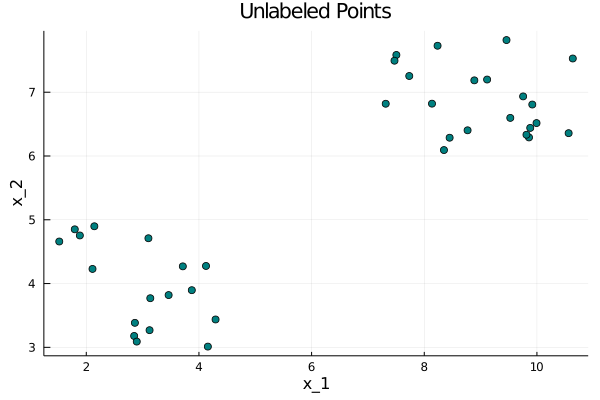

In [21]:
# Generate the artificial data
function CircleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    return h.+r*sin.(θ), k.+r*cos.(θ)
end

# Assume center of cluster 1 is (3, 4) with radius 1.8
cluster1 = [(3 + (-1)^rand(1:2)*rand(1:2)*rand(), 4 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

# Assume center of cluster 2 is (9, 7) with radius 2.2
cluster2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

# Make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data, x)
end

# Plot the data
plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Unlabeled Points")
scatter!(data, color = "teal")

<font size="3">Now we will plot this data to show that the data points are clustered according to their specific circle. </font>

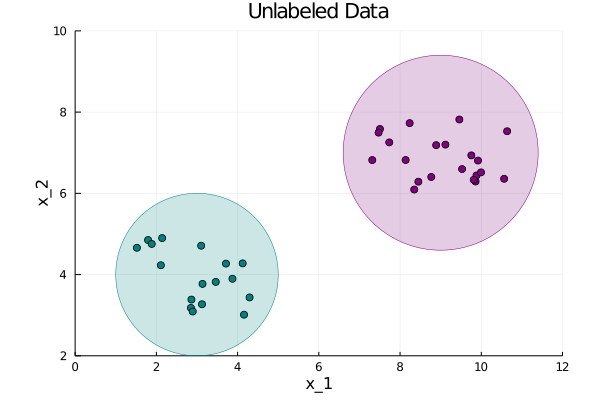

In [23]:
# Plot it
plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Unlabeled Data")

plot!(CircleShape(3, 4, 2.0), seriestype = [:shape, ], lw = 0.5,
c = "teal", linecolor = "teal", legend = false, fillalpha = 0.2, 
    aspect_ratio = 1)
plot!(CircleShape(9, 7, 2.4), seriestype = [:shape, ], lw = 0.5,
c = "purple", linecolor = "purple", legend = false, fillalpha = 0.2,
aspect_ratio = 1)

scatter!(cluster1, color = "teal", legend = false)
scatter!(cluster2, color = "purple", legend = false)

### Implement the algorithm

<font size = "3"> As the K-Means algorithm works to discover the similar data, it works with the number of groups, $K$, to cluster according to distance. It does this by iterating through each data point and assigning them to one of the $K$ groups based on the similarities in the features provided. 

Each data point is then labeled according to the cluster that it is assigned to. Clustering allows us to find and analyze groups prior to defining them in advance; and by examining the centroid's feature weights, we can qualitatively interpret the groupings represented by the clusters.

As such, let $X$ denote the collection of unlabeled data and, $C = c^1$, ..., $c^K$ denote the collection of $K$ centroids $c^i$ for $i = 1$, ..., $K$. At each iteration of the K-means algorithm, we will calculate the distance from each point in $X$ to each centroid, $c^i$, for $i=1$, ..., $K$ using the previously defined Euclidean Distance formula.
</font> 

In [4]:
# Define Euclidean distance

function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

<font size = "3">After calculating the distance to each centroid, we must then assign each data point in $X$ to a centroid. This assignment is done using the following function: 
    $$
    \text{argmin}_{c^i \in C}  d(c^i, x)
    $$ 
    
where $x \in X$. This will be done using the function in the following code cell.</font>

In [5]:
# Define the K-Means Distance
function kMeans_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_Dict = Dict()
        for i = 1:k
            temp_Dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_Dict
    end
    return distances
end

kMeans_distances (generic function with 1 method)

In [6]:
# Define the K-Means Clustering
function kMeans_Clustering(X, centroids, k)
    distances = kMeans_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_distance = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_distance
                clusters[p] = i
                min_distance = distances[p][i]
            end
        end
    end
    return clusters
end

kMeans_Clustering (generic function with 1 method)

<font size="3">Once points in $X$ have been assigned to a given centroid in $C$, the $K$-means algorithm has basically assigned the current labels to all of the point in $X$ at the iteration. So now we will let $S_i$ denote the set of points in $X$ that have currently been assigned to the centroid $c_i$; and the algorithm must now update the centroids in $C$ according to the mean of the points in $S_i$:

$$ c_{j}^{i} = \frac{1}{\lvert S_i \rvert} \sum_{x \in S_i} x_j $$

A function for computing the new centers is shown in the following code cell. </font>

In [7]:
# Centroid Update Function
function kMeans_update_Centroids(X, centroids, k)
    clusters = kMeans_Clustering(X, centroids, k)
    newCentroids = []
    for j = 1:k
        x = mean([p[1]::Float64 for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2]::Float64 for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(newCentroids, point)
        j += 1
    end
    return newCentroids
end

kMeans_update_Centroids (generic function with 1 method)

---

### Test the functions

<font size="3">With our functions created, we will test them to ensure that they are working. </font>

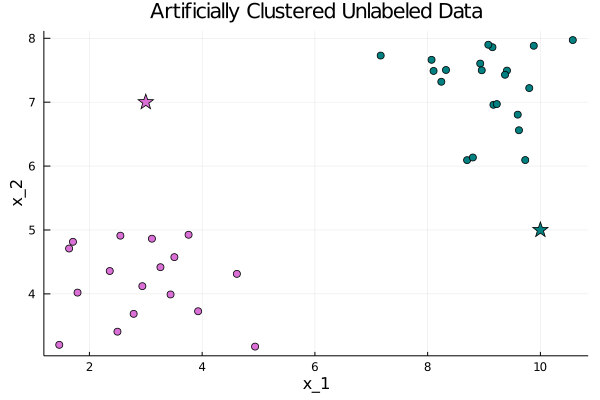

In [8]:
#Test functions (k = 2)
initialCentroids = [(rand(1.0:10.0), rand(1.0:10.0)), (rand(1.0:10.0), rand(1.0:10.0))]
clusters = kMeans_Clustering(data, initialCentroids, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", #, xlim = (0, 12), ylim = (0, 10),
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "teal", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "orchid", legend = false)

scatter!([initialCentroids[1]], color = "teal", shape= :star5, markersize=8)
scatter!([initialCentroids[2]], color = "orchid", shape= :star5, markersize=8)

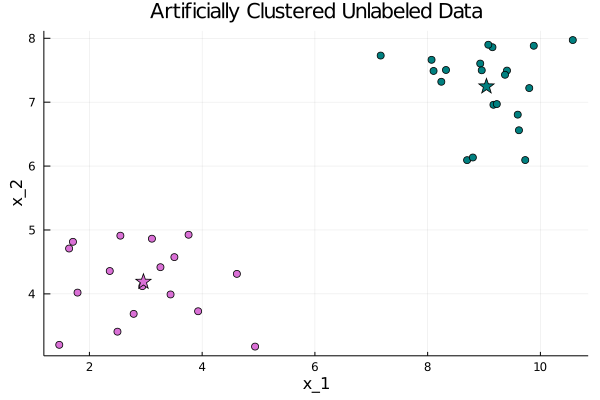

In [20]:
# Test update function
centroidsTest = kMeans_update_Centroids(data, initialCentroids, 2)
clusters2 = kMeans_Clustering(data, centroidsTest, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2",
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters2) if clusters2[x] == 1], color = "teal", legend = false)
scatter!([x for x in keys(clusters2) if clusters2[x] == 2], color = "orchid", legend = false)


scatter!([centroidsTest[1]], color = "teal", shape= :star5, markersize=8)
scatter!([centroidsTest[2]], color = "orchid", shape= :star5, markersize=8)

---
### Build and Test the Algorithm

<font size="3">Now that we know are functions are working properly, we can build and implement the K-Means Algorithm utilizing our completed functions.</font>

In [10]:
# K-Means Algorithm
function kMeans_algorithm(X, k, ϵ; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] - j))
    end
    
    new_centroids = kMeans_update_Centroids(X, centroids, k)
    h = 1
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ && h < 10000000
        centroids, new_centroids = new_centroids, kMeans_update_Centroids(X, new_centroids, k)
        h+=1
    end
    
    if return_centroids == false
        new_centroids = kMeans_Clustering(X, new_centroids, k)
        return new_centroids
    else
        return new_centroids
    end
end

kMeans_algorithm (generic function with 1 method)

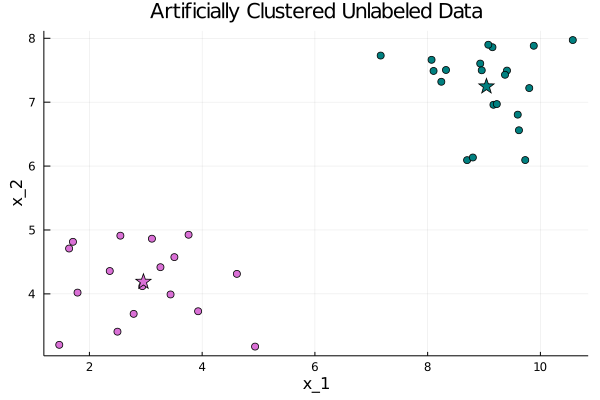

In [19]:
#Test the function
centroidsTesting = kMeans_algorithm(data, 2, 0.0001, return_centroids = true)

plot(legend = false, xlabel = "x_1", ylabel = "x_2",
    title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "teal", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "orchid", legend = false)

scatter!([centroidsTesting[1]], color = "teal", shape= :star5, markersize=8)
scatter!([centroidsTesting[2]], color = "orchid", shape= :star5, markersize=8)

<font size="3">Now we will attempt to implement it on a data set with a cluster size, $k=3$.</font>

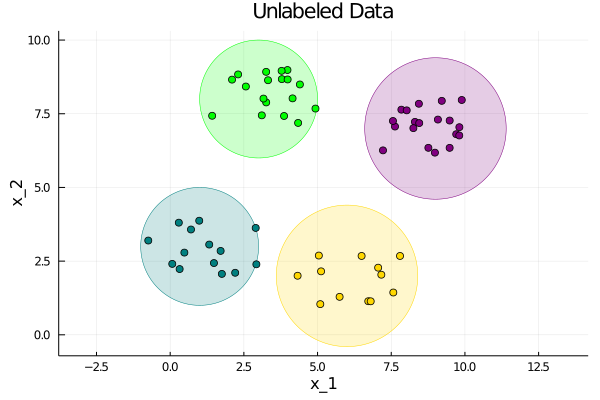

In [12]:
# Generate the artificial data

# Assume center of cluster 1 is (1, 3) with radius 1.8
cluster_1 = [(1 + (-1)^rand(1:2)*rand(1:2)*rand(), 3 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:14]

# Assume center of cluster 2 is (9, 7) with radius 2.2
cluster_2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:19]

# Assume center of cluster 1 is (3, 8) with radius 1.8
cluster_3 = [(3 + (-1)^rand(1:2)*rand(1:2)*rand(), 8 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:18]

# Assume center of cluster 2 is (6, 2) with radius 2.2
cluster_4 = [(6 + (-1)^rand(1:2)*rand(1:2)*rand(), 2 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:12]

# Make the full data set of unlabeled points
data_new = copy(cluster_1)

for x in cluster_2
    push!(data_new, x)
end
for x in cluster_3
    push!(data_new, x)
end
for x in cluster_4
    push!(data_new, x)
end

# Plot the data
plot(legend = false, xlabel = "x_1", ylabel = "x_2",
    title = "Unlabeled Data")

plot!(CircleShape(1, 3, 2.0), seriestype = [:shape, ], lw = 0.5, c = "teal", linecolor = "teal", 
    legend = false, fillalpha = 0.2, aspect_ratio = 1)
plot!(CircleShape(9, 7, 2.4), seriestype = [:shape, ], lw = 0.5, c = "purple", linecolor = "purple", 
    legend = false, fillalpha = 0.2, aspect_ratio = 1)
plot!(CircleShape(3, 8, 2.0), seriestype = [:shape, ], lw = 0.5, c = "lime", linecolor = "lime", 
    legend = false, fillalpha = 0.2, aspect_ratio = 1)
plot!(CircleShape(6, 2, 2.4), seriestype = [:shape, ], lw = 0.5, c = "gold", linecolor = "gold", 
    legend = false, fillalpha = 0.2, aspect_ratio = 1)

scatter!(cluster_1, color = "teal", legend = false)
scatter!(cluster_2, color = "purple", legend = false)
scatter!(cluster_3, color = "lime", legend = false)
scatter!(cluster_4, color = "gold", legend = false)

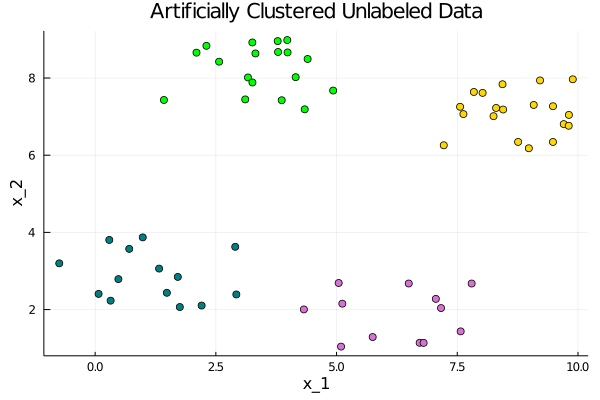

In [18]:
#Test the function (k=4)

clusters_new = kMeans_algorithm(data_new, 4, .0001, return_centroids = false)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters_new) if clusters_new[x] == 1], color = "teal", legend = false)
scatter!([x for x in keys(clusters_new) if clusters_new[x] == 2], color = "orchid", legend = false)
scatter!([x for x in keys(clusters_new) if clusters_new[x] == 3], color = "lime", legend = false)
scatter!([x for x in keys(clusters_new) if clusters_new[x] == 4], color = "gold", legend = false)

---

## Conclusion

<font size="3">As you can see from the above plot, this K-Means Algorithm does work accurately. </font>
<br>

### For more information please see:

<br>
<font size="3">

+ [K-Means Clustering - Wiki](https://en.wikipedia.org/wiki/K-means_clustering)

    
+ [Kmeans Clustering - Towards Data Science](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) </font>

---
---